# 多变量线性回归（Linear Regression with Multiple Variables）
## 浙江理工大学 沈炜

# Tensorflow实现多变量线性回归

** 在上一节，使用Tensorflow构建了第一个完整的模型——一元线性回归。在这一节中，将构建一个多变量线性模型来实现多维数据的回归。此外，还将介绍如何利用Tensorflow自带的可视化工具TensorBoard分析训练过程。 **

## 载入数据

** 导入相关库 **

In [1]:
# %matplotlib notebook
%matplotlib inline

import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.contrib.learn as skflow
from sklearn.utils import shuffle
import numpy as np
import pandas as pd

c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
c:\python37\lib\site-packages\tensorflow\python\framework\dtypes.py:529: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is depr

上述运行会有一个警告<br>
C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters<br>
解决方法：
<img src='h5py.png'>

** 数据集简介 **

本数据集包含与波士顿房价相关的多个因素，如下图：<br>
<img src='columns.png'>

** 数据集以CSV格式存储，可通过Pandas库读取并进行格式转换 **

** Pandas库 **可以帮助我们快速读取常规大小的数据文件<br>
能够读取CVS文件, 文本文件、MS Excel、SQL数据库以及用于科学用途的HDF5格式文件<br>
自动转换为Numpy的多维阵列<br>
Pandas资源：http://pandas.pydata.org/pandas-docs/stable/basics.html#basics<br>
http://python.jobbole.com/84416/<br>
HDF相关信息参见：https://baike.baidu.com/item/HDF/1256312?fr=aladdin<br>

** 通过Pandas导入数据 **

In [7]:
df = pd.read_csv("data/boston.csv", header=0)   # 数据在当前目录的data目录下
# header = 0是默认情况（即不标明，默认就是header = 0），表示以数据的第一行为列标题。
print(type(df))
print(df.shape)
print (df.describe())  # 输出数据的描述，计数，平均值，标准差，最小值，最大值以及百分位数

<class 'pandas.core.frame.DataFrame'>
(506, 13)
             CRIM         ZN       INDUS         CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677082   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO       LSTAT  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.4

** 载入本示例所需数据 **

In [8]:
x_data = df[['CRIM', 'DIS', 'LSTAT']].values.astype(float) #选取其中3个比较重要的影响因素
y_data = df['MEDV'].values.astype(float) #获取y

## 构建模型 

** 定义$x$和$y$的占位符 **

In [9]:
x = tf.placeholder(tf.float32, [None,3], name = "x") # 3个影响因素,[None, 3]表示列是3，行不定
y = tf.placeholder(tf.float32, [None,1], name = "y")

** 创建变量 **

In [10]:
with tf.name_scope("Model"):  # 创建了一个命名域，类似于命名空间
    w = tf.Variable(tf.random_normal([3,1], stddev=0.01), name="w0")
    b = tf.Variable(1., name="b0")
    def model(x, w, b):
        return tf.matmul(x, w) + b  # 注意这里的matmul，表示矩阵相乘，与上一次课有差别

    pred= model(x, w, b)

Instructions for updating:
Colocations handled automatically by placer.


<img src="name_scope_w.jpg" >

可以看到** b0 **和** w0 **都在命名空间** Model **下

** 补充介绍——命名空间name_scope ** <br>
Tensorflow中常有数以千计节点，在可视化过程中很难一下子全部展示出来，因此可用name_scope为变量划分范围，在可视化中，这表示在计算图中的一个层级。<br>
- name_scope** 不会影响 **用get_variable()创建的变量的名字<br>
- name_scope** 会影响 **用Variable()创建的变量以及op_name<br>
参见：https://blog.csdn.net/u012609509/article/details/80045529

## 训练模型 ##

** 设置训练参数 **

In [23]:
train_epochs = 60 # 迭代次数
learning_rate = 0.01 #学习率

** 定义均方差损失函数 **

In [12]:
with tf.name_scope("LossFunction"):
    loss_function = tf.reduce_mean(tf.pow(y-pred, 2)) #均方误差

<img src="loss_function_multi.jpg" width=400 height=400/>

同样，我们可以通过TensorBoard查看命名空间LossFunction下的操作（op），包括：mean, pow和sub(相减)，与我们定义的loss_function = tf.reduce_mean(tf.pow(y-pred, 2))相一致。

** 选择优化器 **

In [13]:
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss_function) # 使用Adam算法的优化器，前一次我们用的是梯度下降
# https://blog.csdn.net/leadai/article/details/79178787

** 声明会话 **

In [14]:
sess = tf.Session()
init = tf.global_variables_initializer()

** 生成图协议文件 **

In [15]:
log_dir='d:/log/boston'
tf.train.write_graph(sess.graph, log_dir,'graph.pbtxt')

'd:/log/boston\\graph.pbtxt'

In [16]:
loss_op = tf.summary.scalar("loss", loss_function) #tf.summary()的各类方法，能够保存训练过程以及参数分布图并在tensorboard显示
merged = tf.summary.merge_all() #合并默认图中收集的所有summaries

本示例中通过** tf.summary.scalar **记录loss_function的值，因此可在TensorBoard的SCALARS面板中查看到如下可视化结果：

<img src="loss_scalar_multi.jpg" width=600 height=500 />

** 启动会话 **

In [17]:
sess.run(init)

** 创建摘要的文件写入符（FileWriter） **

In [18]:
writer = tf.summary.FileWriter(log_dir, sess.graph) 

tf.summary.FileWriter('/path/to/logs', sess.graph) 中所指定的路径‘/path/to/logs’，是运行tensorboard命令时参数logdir的值

** 迭代训练 **

In [24]:
loss_list=[]
for epoch in range (train_epochs):
    lossv=0.0
    loss_sum=0
    for xs, ys in zip(x_data, y_data):   
        z1 = xs.reshape(1,3)
        z2 = ys.reshape(1,1)
        sess.run(optimizer, feed_dict={x: z1, y: z2}) 
        summary_str = sess.run(loss_op, feed_dict={x: z1, y: z2})
        lossv+=sess.run(loss_function, feed_dict={x: z1, y: z2})
        loss_sum+=lossv
        writer.add_summary(summary_str, epoch)
    xvalues, yvalues = shuffle(x_data, y_data)
    b0temp=b.eval(session=sess)
    w0temp=w.eval(session=sess)
    print("epoch=", epoch+1,"b=", b0temp,"w=", w0temp )
    loss_avg=loss_sum/len(y_data)   # 计算平均损失
    loss_list.append(loss_avg)
    print ('loss=',loss_avg)

epoch= 1 b= 34.454224 w= [[-0.15878035]
 [-0.5999975 ]
 [-0.86469436]]
loss= 9132.50181932595
epoch= 2 b= 34.66498 w= [[-0.16110788]
 [-0.62657297]
 [-0.87259513]]
loss= 9111.507105621047
epoch= 3 b= 34.865257 w= [[-0.1633268 ]
 [-0.65179306]
 [-0.88010246]]
loss= 9093.299800897234
epoch= 4 b= 35.055523 w= [[-0.16544156]
 [-0.67572445]
 [-0.887236  ]]
loss= 9077.575732979636
epoch= 5 b= 35.23619 w= [[-0.16745397]
 [-0.6984216 ]
 [-0.8940081 ]]
loss= 9064.069760599532
epoch= 6 b= 35.40777 w= [[-0.16936873]
 [-0.7199524 ]
 [-0.90044165]]
loss= 9052.514056770802
epoch= 7 b= 35.570663 w= [[-0.1711879 ]
 [-0.7403705 ]
 [-0.90654916]]
loss= 9042.696853304096
epoch= 8 b= 35.72528 w= [[-0.17291598]
 [-0.7597314 ]
 [-0.91234726]]
loss= 9034.408468489339
epoch= 9 b= 35.872017 w= [[-0.17455715]
 [-0.7780856 ]
 [-0.9178516 ]]
loss= 9027.47939010851
epoch= 10 b= 36.011303 w= [[-0.17611426]
 [-0.79548776]
 [-0.92307717]]
loss= 9021.735329286963
epoch= 11 b= 36.143482 w= [[-0.17759088]
 [-0.81198895]

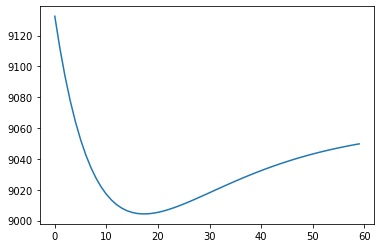

In [25]:
plt.plot(loss_list)

In [26]:
print("y=",w0temp[0], "x1+",w0temp[1], "x2+",w0temp[2], "x3+", [b0temp])
print("y=",w0temp[0], "CRIM+", w0temp[1], 'DIS+', w0temp[2], "LSTAT+", [b0temp])

y= [-0.20207885] x1+ [-1.0907991] x2+ [-1.0129426] x3+ [38.396828]
y= [-0.20207885] CRIM+ [-1.0907991] DIS+ [-1.0129426] LSTAT+ [38.396828]


In [27]:
n = np.random.randint(506)       #随机确定一条来看看效果
print(n)
x_test = x_data[n]

x_test = x_test.reshape(1,3)
predict = sess.run(pred,feed_dict={x:x_test})
print("预测值：%f"%predict)

target = y_data[n]
print("标签值：%f"%target)

257
预测值：31.122454
标签值：50.000000


In [23]:
len(loss_list)

50

## 实验题
### 实验题1：请你修改损失函数，或优化器，再运行本实例，看看运行结果差异。多尝试一下，思考出现差异的原因。